In [1]:
import numpy as np
import pandas as pd
from functions import *
from schemes import *
from plot import * 
from Kepler import *
from adaptive import *
from FRSolver import * 

%matplotlib inline

In [2]:
# gravity
G = 1

m1 = 1
m2 = 1
m3 = 1

# position
r1 = np.array([-1,0.0,0.0], dtype="float64")
r2 = np.array([0,0.0,0.0], dtype="float64")
r3 = np.array([1,0.0,0.0], dtype="float64")

w1 = 0
w2 = np.sqrt(1.25)
# velocity 
v1 = np.array([w1,-w2,0], dtype="float64")
v2 = np.array([0,0,0], dtype="float64")
v3 = np.array([w1,w2,0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2,r3])
v0s = np.array([v1,v2,v3])
masses = np.array([m1, m2, m3])

In [3]:
exs = np.linspace(-0.01,0.01,101)
eys = np.flip(np.linspace(-0.01, 0.01, 101))

In [4]:
T = 60
C = 0.2

In [5]:
E0 = np.sum(TotalEnergy(r0s, v0s, G, masses))

stabilities = []
ts = []
Es = []
variances = []
for ex in exs:
    for ey in eys:
        print(ex, ey)
        w = 0.75984

        # position
        r1 = np.array([0,1,0], dtype="float64")
        r2 = np.array([- np.cos((np.pi / 6) + ex), - np.sin((np.pi / 6) + ex),0.0], dtype="float64")
        r3 = np.array([np.cos((np.pi / 6) + ey), - np.sin((np.pi / 6) + ey),0.0], dtype="float64")

        # velocity 
        v1 = w * np.array([-1, 0, 0], dtype="float64")
        v2 = w * np.array([np.sin((np.pi / 6) + ex),-np.cos((np.pi / 6) + ex),0], dtype="float64")
        v3 = w* np.array([np.sin((np.pi / 6) + ey),np.cos((np.pi / 6) + ey),0], dtype="float64")

        # create initial vectors
        r0s = np.array([r1,r2,r3])
        v0s = np.array([v1,v2,v3])
        masses = np.array([m1, m2, m3])
        
        stability, variance, maxE, maxT = shapeSolver(T, C, r0s, v0s, G, masses)

        variances.append(variance)
        stabilities.append(stability)
        ts.append(maxT)
        Es.append(maxE)

stabilities = np.array(stabilities).reshape(len(exs), len(eys))
Es = np.array(stabilities).reshape(len(exs), len(eys))
ts = np.array(ts).reshape(len(exs), len(eys))
variances = np.array(variances).reshape(len(exs), len(eys))

-0.01 0.01
-0.01 0.009800000000000001
-0.01 0.0096
-0.01 0.0094
-0.01 0.009200000000000002
-0.01 0.009
-0.01 0.0088
-0.01 0.008600000000000002
-0.01 0.0084
-0.01 0.0082
-0.01 0.008000000000000002
-0.01 0.0078
-0.01 0.007600000000000001
-0.01 0.007400000000000002
-0.01 0.0072
-0.01 0.007000000000000001
-0.01 0.006800000000000002
-0.01 0.0066
-0.01 0.006400000000000001
-0.01 0.006199999999999999
-0.01 0.006
-0.01 0.005800000000000001
-0.01 0.005600000000000001
-0.01 0.0054
-0.01 0.0052
-0.01 0.005000000000000001
-0.01 0.0048000000000000004
-0.01 0.0046
-0.01 0.004400000000000001
-0.01 0.004200000000000001
-0.01 0.004
-0.01 0.0038000000000000013
-0.01 0.0036000000000000008
-0.01 0.0034000000000000002
-0.01 0.0031999999999999997
-0.01 0.003000000000000001
-0.01 0.0028000000000000004
-0.01 0.0026
-0.01 0.002400000000000001
-0.01 0.0022000000000000006
-0.01 0.002
-0.01 0.0017999999999999995
-0.01 0.0016000000000000007
-0.01 0.0014000000000000002
-0.01 0.0011999999999999997
-0.01 0.0010000000

In [6]:
import pandas as pd 
df = pd.DataFrame(variances)
df.to_csv("Data/Lagrange/variances.csv")

df = pd.DataFrame(stabilities)
df.to_csv("Data/Lagrange/stabilities.csv")

df = pd.DataFrame(Es)
df.to_csv("Data/Lagrange/Es.csv")

df = pd.DataFrame(ts)
df.to_csv("Data/Lagrange/ts.csv")

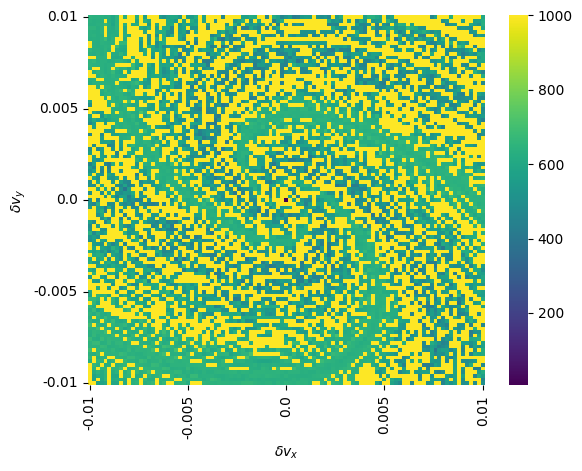

In [14]:
import seaborn as sns
from matplotlib.colors import ListedColormap


# Create a figure and axis for the heatmap
fig, ax = plt.subplots()

# Create the heatmap using Seaborn
sns.heatmap(variances.T,cmap = 'viridis',  cbar=True, ax=ax, vmax = 1000)

# Determine the tick positions
num_ticks = 5
tick_positions = np.linspace(0, variances.shape[0] - 1, num_ticks, dtype=int) 

# Set the tick positions and labels for both x-axis and y-axis
ax.set_xticks(tick_positions + 0.5)
ax.set_yticks(tick_positions + 0.5)
ax.set_xticklabels(np.round(exs,3)[tick_positions])
ax.set_yticklabels(np.round(eys,3)[tick_positions])

# Set axis labels and title
ax.set_xlabel(f'$\delta v_x$')
ax.set_ylabel('$\delta v_y$')

colorbar = ax.collections[0].colorbar
# colorbar.set_ticks(0.375 * np.array([1, 3, 5, 7]))
# colorbar.set_ticklabels(['$d > 10$', '$T > {1000}}$', '$h < 0.001$', '$E > 0.01$'])

# Show the plot
plt.show()

In [8]:
E0 = np.sum(TotalEnergy(r0s, v0s, G, masses))

pxhat = w1 -0.020000000000000004
pyhat = w2 + 0

# velocity 
v1hat = np.array([pxhat,- pyhat,0], dtype="float64")
v2hat = np.array([0,0,0], dtype="float64")
v3hat = np.array([pxhat,pyhat,0], dtype="float64")
v0shat = np.array([v1hat,v2hat,v3hat])

R = findR(v0shat, E0, masses)

# position
r1hat = np.array([-R,0.0,0.0], dtype="float64")
r2hat = np.array([0,0.0,0.0], dtype="float64")
r3hat = np.array([R,0.0,0.0], dtype="float64")
r0shat = np.array([r1hat,r2hat,r3hat])

traj, stability = fullSolver(T, C, r0shat, v0shat, G, masses)


In [9]:
print(stability)

1


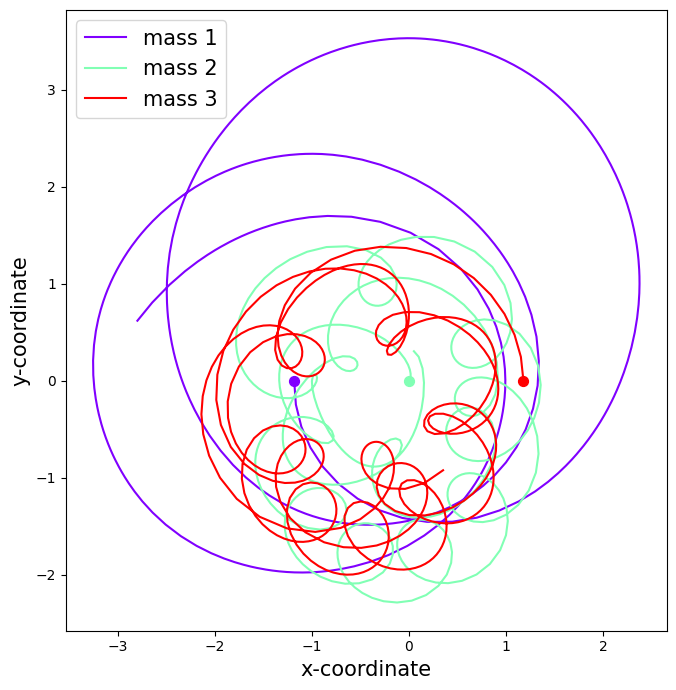

In [10]:
PlotOrbits(traj)